In [62]:
import torch
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import pickle as pkl

In [21]:
'''
#the dataset that is used to train the model
train=datasets.MNIST("",train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))


#data used to test the model (not a part of your actual data sample to detect overfitting)
test=datasets.MNIST("",train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))
'''

In [64]:
with open('C:/Users/HP/OneDrive/Desktop/MNIST_data/MNIST_data.pkl', 'rb') as f:
    data = pkl.load(f)
    trainX,trainY=data

In [32]:
trainingSet=torch.utils.data.DataLoader(,batch_size=10,shuffle=True)
#batch size means the no. of data points you are passing to your model in one go

testingSet=torch.utils.data.DataLoader(test,batch_size=32,shuffle=True) 

In [33]:
'''
for data in trainingSet:
    print(data)
    break
'''

'\nfor data in trainingSet:\n    print(data)\n    break\n'

In [34]:
#x,y=data[0][0],data[1][0]
#print(y)

In [35]:
#plt.imshow(data[0][3].view(28,28))
#plt.show()

In [36]:
#what is balancing?: trying to make sure that the examples present in your dataset are all unformly  
#distributed don't have too much amongst the possible outcomes and data corresponding to a specific class
'''
total=0
counterDict={0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
for data in trainingSet:
    xs,ys = data
    for y in ys:
        counterDict[int(y)] +=1
        total+=1
print(counterDict)    
for i in counterDict:
    print("Percentage of data corresponding to",i,"is",counterDict[i]/total*100)
'''

'\ntotal=0\ncounterDict={0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}\nfor data in trainingSet:\n    xs,ys = data\n    for y in ys:\n        counterDict[int(y)] +=1\n        total+=1\nprint(counterDict)    \nfor i in counterDict:\n    print("Percentage of data corresponding to",i,"is",counterDict[i]/total*100)\n'

In [37]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        #we are trying to make a neural network with 3 layer with 64 neurons each 
        self.fc1=nn.Linear(784,64)#fc1:fully connected layer 1, 784 because the image is 28*28, 64 is the number of neurons
        self.fc2=nn.Linear(64,64)
        self.fc3=nn.Linear(64,64)
        self.fc4=nn.Linear(64,10)
    def forward(self,x):#to define the flow of data through the network
        #here we could put conditional statements to create branches in the neural network
        x=F.relu(self.fc1(x)) 
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=self.fc4(x) 
        return F.log_softmax(x,dim=1) 
net=Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [38]:
X = torch.rand((28,28))
#plt.imshow(X)
#plt.show()
X=X.view(-1,28*28)

In [39]:
output=net(X)
print(output)

tensor([[-2.2580, -2.3497, -2.2120, -2.1728, -2.3736, -2.3153, -2.3403, -2.3583,
         -2.3025, -2.3652]], grad_fn=<LogSoftmaxBackward0>)


In [45]:
optimizer=optim.Adam(net.parameters(),lr=0.001)
EPOCHS=3 #EPOCH refers to the number of times you run through your entire data
for epoch in range(EPOCHS):
    for data in trainingSet:
        #data is a batch of featuresets and labels
        X,y=data
        #print(X[0])
        #print(y[0])
        net.zero_grad()
        output=net(X.view(-1,28*28))
        loss=F.nll_loss(output,y) #when our data isn't a one hot vector, we calculate loss like this
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0157, grad_fn=<NllLossBackward0>)
tensor(0.1187, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)


In [48]:
correct=0
total=0

with torch.no_grad():
    for data in trainingSet:
        X,y=data
        output=net(X.view(-1,28*28))
        for idx,i in enumerate(output):
            if torch.argmax(i)==y[idx]:
                correct += 1
            total += 1

print("Accuracy:",round(correct/total,3))

Accuracy: 0.992


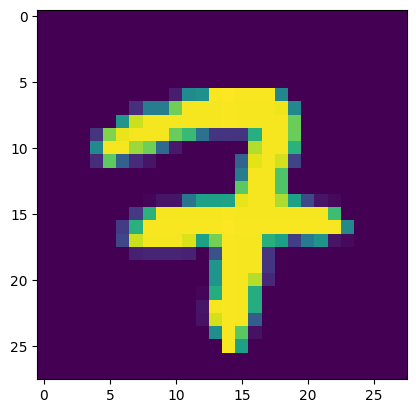

In [60]:
plt.imshow(X[9].view(28,28))
plt.show()

In [61]:
print(torch.argmax(net(X[9].view(-1,28*28))[0]))

tensor(7)
